In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model

In [6]:
# Ler dataset mnist da FP 06
data_dir = "datasets" 
train_csv = os.path.join(data_dir, "mnist_train.csv")
test_csv = os.path.join(data_dir, "mnist_test.csv")

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Split em treino e teste
y_train = train_df.iloc[:, 0].values
x_train = train_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values

# Normalizar para 0..1 (modelos aprendem melhor quando todas as variáveis estão numa gama de valores semelhante)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Modelos CNN requerem a informação de forma espacial. No a arquitetura está definida para 28x28x1 (28x28 pixeis e 1 canal de cor)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [7]:
# Inicializar modelo
model = Sequential([
    # "Forma" do input (informação espacial)
    Input(shape=(28, 28, 1)),

    # Conv2D(filtros, kernel_size, activation)
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# treinar o modelo
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8263 - loss: 0.5437 - val_accuracy: 0.9855 - val_loss: 0.0516
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9709 - loss: 0.0971 - val_accuracy: 0.9887 - val_loss: 0.0397
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9802 - loss: 0.0667 - val_accuracy: 0.9910 - val_loss: 0.0340
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9827 - loss: 0.0574 - val_accuracy: 0.9913 - val_loss: 0.0356
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9869 - loss: 0.0426 - val_accuracy: 0.9912 - val_loss: 0.0326


In [9]:
# avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9884 - loss: 0.0358
Test Accuracy: 0.9909


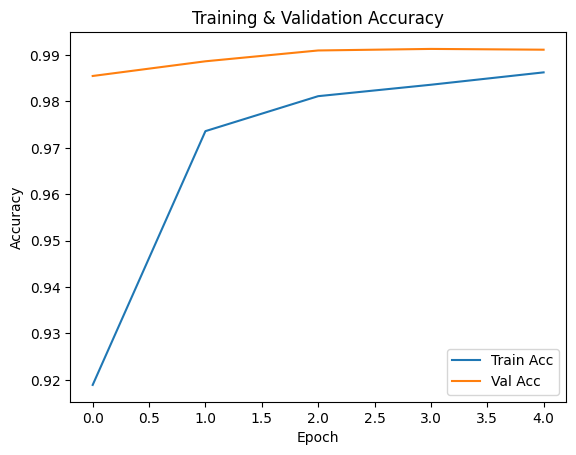

In [10]:
# plot de accuracy ao longo do tempo
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


<Figure size 800x600 with 0 Axes>

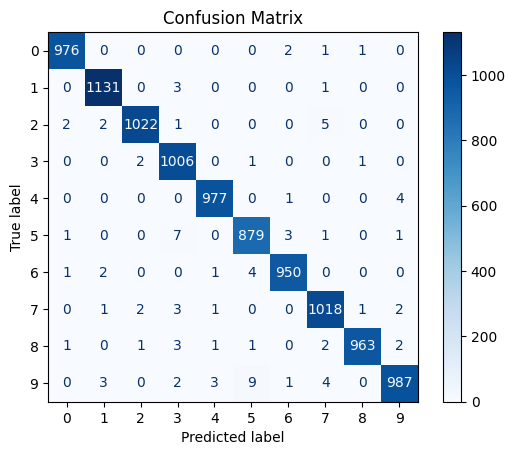

In [11]:
# gerar confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))


plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


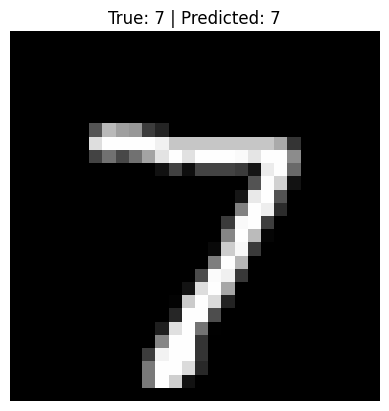

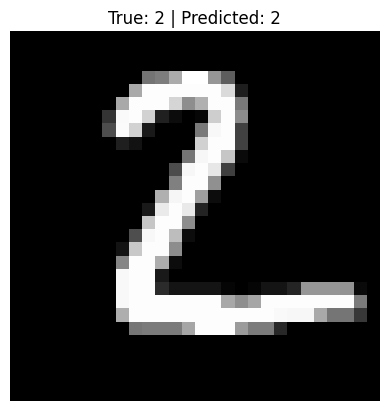

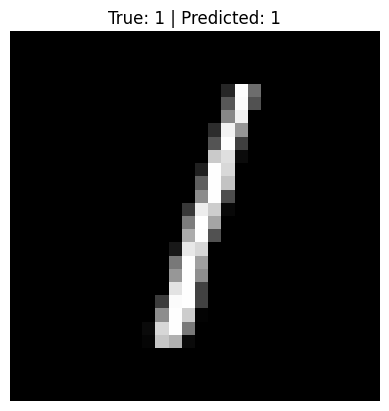

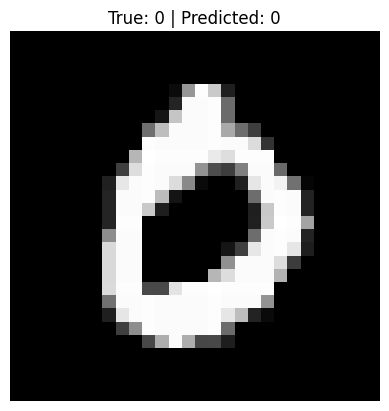

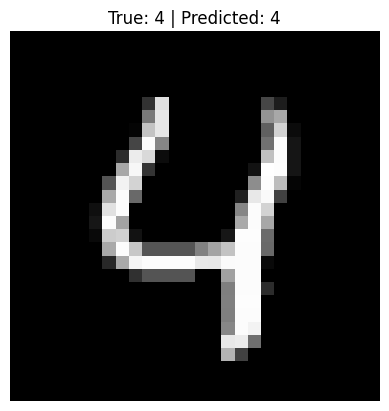

In [12]:
# prever em todas as imagens do dataset, e mostrar as primeiras n
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]} | Predicted: {predicted_classes[i]}")
    plt.axis('off')
    plt.show()

In [13]:
# prever para uma linha específica do dataset de teste
imagem = x_test[42]
label = y_test[42]

# acrescentar o num. de imagens na batch (no caso 1) ao formato esperado pelo modelo: (--> 1, 28, 28, 1)
entrada = np.expand_dims(imagem, axis=0) 

previsao = model.predict(entrada)
classe = np.argmax(previsao) # seleciona o índice com maior probabilidade

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [14]:
previsao

array([[2.5511350e-13, 1.0256137e-09, 4.1349582e-13, 1.7446734e-14,
        9.9999106e-01, 4.9805086e-12, 6.0360585e-11, 2.1050450e-09,
        1.0450606e-09, 8.9566265e-06]], dtype=float32)

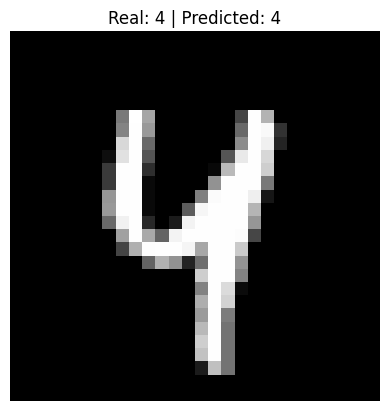

In [15]:
# mostrar a imagem
plt.imshow(imagem.reshape(28, 28), cmap='gray')
plt.title(f"Real: {label} | Predicted: {classe}")
plt.axis('off')
plt.show()

In [16]:
# guardar o modelo
model.save("DL_MNIST.keras")

In [ ]:
# carregar modelo
# model_loaded = load_model("DL_MNIST.keras")

/opt/anaconda3/envs/ML/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
# prever em todas as imagens, filtrar os erros
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

linhas_com_erros = np.where(predicted_classes != y_test)[0]
linhas_com_erros

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([  62,  184,  321,  340,  659,  674,  684,  726,  740,  947,  956,
       1014, 1039, 1182, 1226, 1247, 1260, 1299, 1393, 1527, 1530, 1621,
       1709, 1737, 1790, 1878, 1901, 2018, 2035, 2098, 2130, 2135, 2266,
       2293, 2387, 2454, 2462, 2597, 2654, 2896, 2927, 2939, 3060, 3225,
       3422, 3503, 3520, 3626, 3767, 3808, 3941, 4007, 4078, 4163, 4176,
       4205, 4238, 4256, 4284, 4497, 4500, 4536, 4740, 4761, 4763, 4860,
       4956, 5634, 5937, 5955, 5997, 6091, 6157, 6166, 6172, 6560, 6597,
       6625, 6651, 7121, 8325, 8408, 8527, 9587, 9642, 9664, 9692, 9729,
       9770, 9839, 9982], dtype=int64)

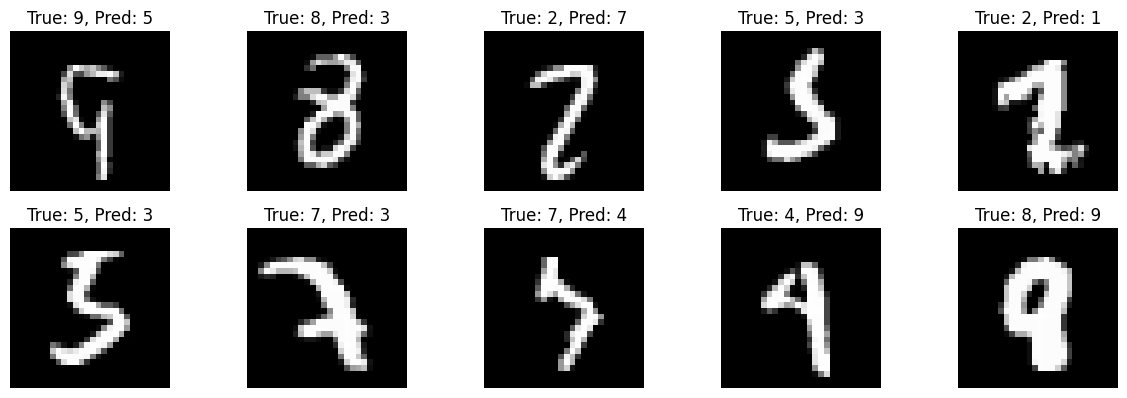

In [18]:
# plot dos primeiros n
plt.figure(figsize=(12, 10))
for i, idx in enumerate(linhas_com_erros[:10]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()